# Sentiment Analysis and Zero-Shot Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [2]:
df1 = pd.read_csv('Amdro.csv', index_col = [0])

In [3]:
df2 = pd.read_csv("Amdro_handlabel.csv", index_col = [0])

In [8]:
df3 = pd.concat([df2,df1], axis=0, ignore_index=True)

In [10]:
df3.to_csv('HandLabel_fixed.csv')

In [7]:
df = pd.read_excel('Amdro.xlsx', index_col = [0])

In [9]:
df.to_csv('Amdro_handlabel.csv')

# Sentiment Analysis

In [9]:
#!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 163 kB 58.3 MB/s 
     |████████████████████████████████| 7.6 MB 39.5 MB/s 


In [10]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [11]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Negative', 'score': 0.895932674407959}]

In [12]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Zero Shot Classificaiton

In [13]:
import transformers
from transformers import pipeline

In [14]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [26]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'effectiveness', 'satisfaction', 'complaints','easy to use'], 
    multi_label = True
)
res

{'sequence': 'It didnt work. The ants didnt even bother eating it.',
 'labels': ['complaints',
  'affordability',
  'effectiveness',
  'satisfaction',
  'easy to use'],
 'scores': [0.7316664457321167,
  0.5096097588539124,
  0.2593369781970978,
  0.07925773411989212,
  0.0039735822938382626]}

In [25]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'effectiveness', 'satisfaction', 'complaints','easy to use'], 
    multi_label = True
)
res

{'sequence': 'This mouse trap works phenomenally! I had tried a few different types of traps last year and my peanut butter would disappear, but there were no mice. I bought this trap, and voila! Today, I heard a mouse in my basement ceiling. I set a trap early this evening and the problem is already resolved. The only reason I didnt give five stars is because I cant find replacement bands at the stores where the traps are sold. I dont need ten traps laying around my house, I just need more bands!',
 'labels': ['effectiveness',
  'satisfaction',
  'easy to use',
  'affordability',
  'complaints'],
 'scores': [0.9896292686462402,
  0.9394617676734924,
  0.776199221611023,
  0.32851076126098633,
  0.24103426933288574]}

In [17]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Excellent product! I normally have to battle keeping carpenter bees from digging their yearly tunnels, but this year I tried AMBRO and I have not seen a carpenter bee around my wooden fence since and I used this product in late April/early May. Thank you AMBRO for saving me the trouble of filling in those tunnels with steel wool and wooden dowels.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.998089611530304,
  0.9689188003540039,
  0.36941394209861755,
  0.02655142731964588]}

In [22]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'effectiveness', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Ive purchased these before and they have worked great. This batch is not working at all.',
 'labels': ['effectiveness', 'affordability', 'complaints', 'satisfaction'],
 'scores': [0.5244876146316528,
  0.3722056746482849,
  0.15119118988513947,
  0.052887722849845886]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [23]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [27]:
# insert the labels you identified from above section
type = ['effectiveness', 'affordability', 'satisfaction', 'complaints','easy to use']

In [28]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [33]:
#assign the max to its aligned type
align_list=[]
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      align_list.append(t)
      
df['align_type']=align_list

In [34]:
# create a "max" column for metric purposes
df['max'] = df[['effectiveness_m', 'affordability_m', 'satisfaction_m', 'complaints_m','easy to use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,effectiveness_m,affordability_m,satisfaction_m,complaints_m,easy to use_m,max,align_type
25455,Garden,141387,1 lb. Fire Ant Killer Bait,https://www.homedepot.com/p/AMDRO-6-oz-Fire-An...,Homedepot,Amdro,100327315,305448173,Yes,2022-06-22T00:00:00,2022,6,25,At one time I counted 300 ant beds in my...,At one time I counted 300 ant beds in my yard ...,organic reviews,14.36,5,0,0,0,No,at one time i counted 300 ant beds in my yard ...,2022-06-22,23,Neutral,0.924131,0.087098,0.087853,0.120293,0.040110,0.924131,effectiveness
4790,Garden,52479,AMDRO Fire Ant Bait 1lb,https://www.lowes.com/pd/AMDRO-1-lb-Fire-Ant-B...,Lowes,Amdro,4573846,3006355,Yes,2021-08-31T00:00:00,2021,8,35,Try a little before you use the entire thing,It didnt work. The ants didnt even bother eati...,organic reviews,10.07,1,0,0,0,No,it didnt work. the ants didnt even bother eati...,2021-08-31,10,Negative,0.200992,0.328625,0.042255,0.701462,0.001873,0.701462,complaints
2772,Garden,24208,AMDRO Mouse Trap,https://www.homedepot.com/p/AMDRO-Mouse-Trap-1...,Homedepot,Amdro,306335043,306335043,No,2021-09-08T00:00:00,2021,9,36,Only one reason for not giving five stars,This mouse trap works phenomenally! I had trie...,syndicated reviews,6.98,4,0,0,0,No,this mouse trap works phenomenally! i had trie...,2021-09-08,92,Positive,0.990253,0.287920,0.933831,0.252780,0.737118,0.990253,effectiveness


# Metric and Sanity Check

In [31]:
import seaborn as sns

AttributeError: ignored

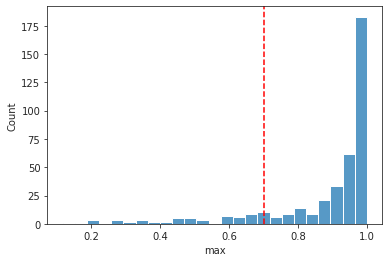

In [32]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [36]:
#creating heatmap
table = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc=np.mean,fill_value=0)
table

align_type,affordability,complaints,easy to use,effectiveness,satisfaction
sentiment,,,,,
Negative,0.588192,0.736826,0.809720,0.792163,0.907231
Neutral,0.965712,0.615811,0.993701,0.872884,0.636047
Positive,0.964284,0.883609,0.992618,0.955487,0.861031


<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

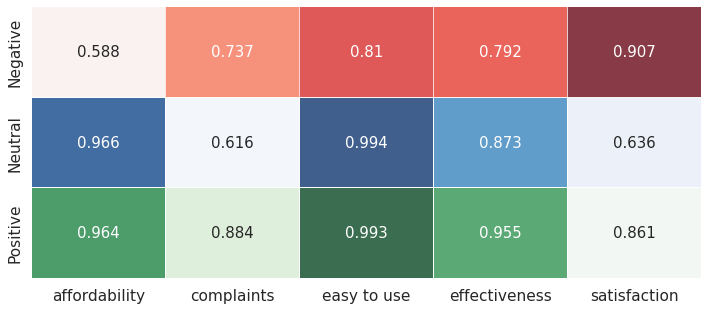

In [37]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [35]:
# to see how many uncategorized data remains
df_uncat = df[df['effectiveness_m'] < 0.7]
df_uncat = df_uncat[df_uncat['affordability_m'] < 0.7]
df_uncat = df_uncat[df_uncat['satisfaction_m'] < 0.7]
df_uncat = df_uncat[df_uncat['complaints_m'] < 0.7]
df_uncat = df_uncat[df_uncat['easy to use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 18726 to 8697
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               58 non-null     object 
 1   review_id             58 non-null     int64  
 2   product_name          58 non-null     object 
 3   producturl            58 non-null     object 
 4   retailer              58 non-null     object 
 5   brand                 58 non-null     object 
 6   retailer_product_id   58 non-null     object 
 7   base_id               58 non-null     object 
 8   variants_flag         58 non-null     object 
 9   review_creation_date  58 non-null     object 
 10  year                  58 non-null     int64  
 11  month                 58 non-null     int64  
 12  week                  58 non-null     int64  
 13  review_title          58 non-null     object 
 14  review_text           58 non-null     object 
 15  review_type        

In [39]:
df_uncat.to_csv('Amdro_data.csv')